## MNIST Digit Classification using Keras

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', context='notebook')

In [2]:
# Load Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train_ohe = np_utils.to_categorical(y_train)

### Visualizing random samples

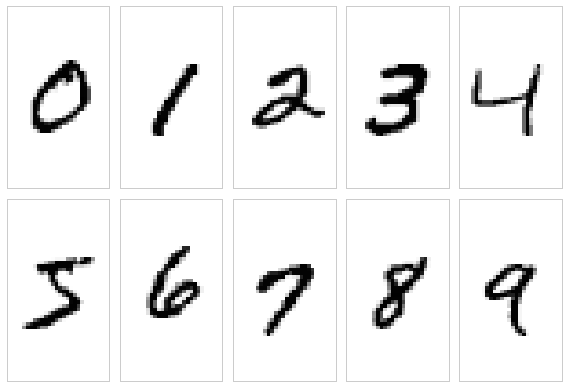

In [3]:
# To get a idea what the images in MNIST look like, let's visualize examples of the digits 0-9
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train==i][0]
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Visualizing samples of 7 and 9 which are most difficult to classify

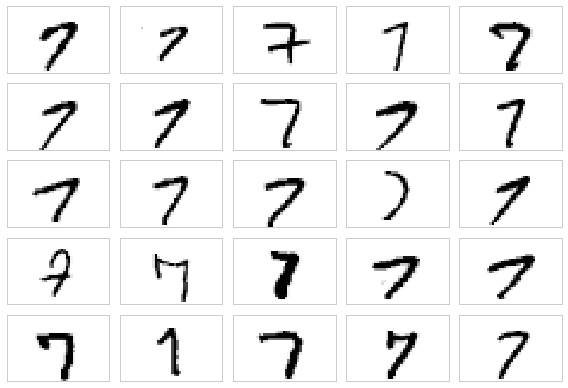

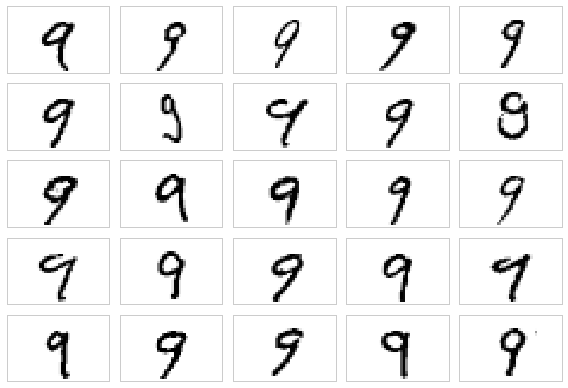

In [6]:
# In addition, let's also plot multiple examples of the same digit to see how different those handwriting examples really are:
digits = [7,9]
for d in digits:
    fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
    ax = ax.flatten()
    for i in range(25):
        img = X_train[y_train==d][i]
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [7]:
# Use keras to build a sequential feedforward network
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

# Convert the class labels (integers 0-9) into the one-hot format with Keras np_utils
y_train_ohe = np_utils.to_categorical(y_train)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# Initialize a new model using the Sequential class to implement a feedforward neural network and then add hidden layers to it
np.random.seed(1)
model = Sequential()
# 784 input units for 28 x 28 pixel data
model.add(Dense(input_dim=784, output_dim=50, init='uniform', activation='tanh')) 
# 50 hidden layer units plus 1 bias unit in each layer. Bias units are initialized to 0 in fully connected networks in Keras.
model.add(Dense(input_dim=50, output_dim=50, init='uniform', activation='tanh'))
# Finally, the number of units in the output layer should be equal to the number of unique class labels 
# i.e.the number of columns in the one-hot encoded class label array.
model.add(Dense(input_dim=50, output_dim=10, init='uniform', activation='softmax')) # 10 output units

In [10]:
# Configure a stochastic gradient descent optimizer
# set values for the weight decay constant and momentum learning to adjust the learning rate
sgd = SGD(lr=0.001, decay=1e-7, momentum=0.9)

# Lastly, we set the cost (or loss) function to categorical_crossentropy. The (binary) cross-entropy is just the technical 
# term for the cost function in logistic regression, and the categorical cross-entropy is its generalization for 
# multi-class predictions via softmax.
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [14]:
# After compiling the model,now train it by calling the fit method.Here, we are using mini-batch stochastic gradient with 
# a batch size of 300 training samples per batch. We train the MLP over 50 epochs. We reserve 20 percent of the training data 
# (here, 12,000 samples) for validation after each epoch so that we can check if the model is overfitting during training
model.fit(X=X_train.reshape(60000, 784), y=y_train_ohe, nb_epoch=50, batch_size=300, verbose=1, validation_split=0.2, show_accuracy=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s - loss: 2.2570 - acc: 0.2940 - val_loss: 2.1870 - val_acc: 0.4585
Epoch 2/50
48000/48000 [==============================] - 8s - loss: 2.0460 - acc: 0.4907 - val_loss: 1.8521 - val_acc: 0.5208
Epoch 3/50
48000/48000 [==============================] - 8s - loss: 1.6270 - acc: 0.5509 - val_loss: 1.4082 - val_acc: 0.6159
Epoch 4/50
48000/48000 [==============================] - 8s - loss: 1.2450 - acc: 0.6692 - val_loss: 1.0702 - val_acc: 0.7371
Epoch 5/50
48000/48000 [==============================] - 8s - loss: 0.9658 - acc: 0.7608 - val_loss: 0.8430 - val_acc: 0.8105
Epoch 6/50
48000/48000 [==============================] - 8s - loss: 0.7820 - acc: 0.8184 - val_loss: 0.6990 - val_acc: 0.8492
Epoch 7/50
48000/48000 [==============================] - 8s - loss: 0.6572 - acc: 0.8511 - val_loss: 0.5871 - val_acc: 0.8700
Epoch 8/50
48000/48000 [==============================] - 8s 

In [16]:
# Make predictions
y_train_pred = model.predict_classes(X_train.reshape(60000, 784), verbose=0)
print('First 3 predictions: ', y_train_pred[:3])

train_acc = np.sum(y_train==y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (train_acc * 100))

y_test_pred = model.predict_classes(X_test.reshape(10000, 784), verbose=0)
print('First 3 predictions: ', y_test_pred[:3])

test_acc = np.sum(y_test==y_test_pred, axis=0) / X_test.shape[0]
print('Testing accuracy: %.2f%%' % (test_acc * 100))

First 3 predictions:  [5 0 4]
Training accuracy: 94.18%
First 3 predictions:  [7 2 1]
Testing accuracy: 93.70%


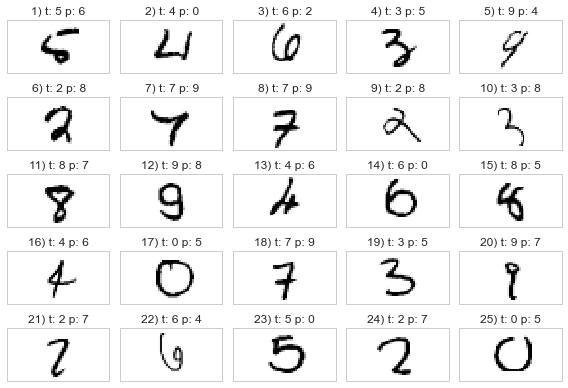

In [17]:
# Now, let's take a look at some of the images that our MLP struggles with. The first number in the subtitles indicates the plot
# index, the second number indicates the true class label (t), and the third number stands for the predicted class label (p).
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()